In [13]:
import preprocessing.preprocessing as pp
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec, KeyedVectors


# Preprocessing and visualization

In [42]:
df = pp.load_data("english_cleaned_lyrics.csv")
df = pp.preprocess_data(df, remove_punct=False)
df = df[['lyrics', 'genre']]
df

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nicolas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nicolas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,lyrics,genre
0,oh baby know i'm gonna cut right chase woman m...,Pop
1,playin everything easy like seem sure still wa...,Pop
2,search tenderness hard find love need live loo...,Pop
3,oh oh oh oh oh oh wrote book stand title book ...,Pop
4,party people people party popping sitting arou...,Pop
...,...,...
218205,gotta say boy couple date hand outright blowin...,Country
218206,helped find diamond ring made try everything t...,Country
218207,look couple corner booth look lot like looking...,Country
218208,fly mortal earth i'm measured depth girth fath...,Country


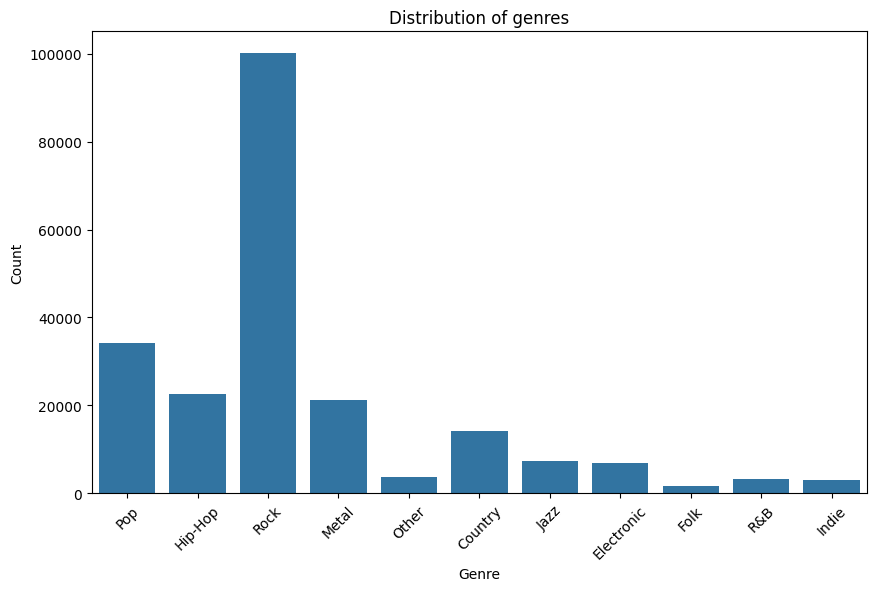

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=df)

plt.title('Distribution of genres') 
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

## Training Word2vec

In [44]:
import importlib
importlib.reload(pp)


<module 'preprocessing.preprocessing' from '/home/nicolas/Prog/python-projects/NLP/nlp-project/src/preprocessing/preprocessing.py'>

In [45]:
X_list = list(df['lyrics'])
X_strings = ' '.join(X_list)
X_sents = pp.tokenize_nltk(X_strings)
X_sents

[nltk_data] Downloading package punkt to /home/nicolas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
len(X_sents[0])

27329245

In [37]:
model = Word2Vec(sentences=X_sents, vector_size=200, window=10, min_count=2, workers=4, epochs=20)
word_vectors = model.wv
word_vectors.save("word2vec.wordvectors") # Store the words and their trained embeddings
del model

In [38]:
def print_similar_words(words):
    for word in words:
        if word in wv:
            sims = wv.most_similar(word, topn=10)
            print(f"Words most similar to '{word}':")
            for sim in sims:
                print(f"{sim[0]} ({sim[1]:.4f})")
        else:
            print(f"Word '{word}' not in vocabulary.")

query_words = ['love', 'hate', 'happy', 'sad', 'baby', 'night', 'music']
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')

print_similar_words(wv, query_words)

Words most similar to 'love':
sweet (0.9901)
notice (0.9896)
fall (0.9888)
night (0.9873)
easy (0.9871)
thats (0.9871)
angel (0.9837)
deep (0.9833)
cause (0.9828)
care (0.9813)
Words most similar to 'hate':
lie (0.9758)
tired (0.9634)
one (0.9547)
without (0.9540)
everybodys (0.9515)
body (0.9495)
cant (0.9483)
live (0.9479)
knew (0.9471)
forgive (0.9460)
Words most similar to 'happy':
end (0.9957)
marriage (0.9953)
boomer (0.9944)
keeping (0.9942)
successful (0.9940)
river (0.9940)
manolo (0.9939)
blahnik (0.9938)
600 (0.9937)
drop (0.9936)
Words most similar to 'sad':
yaiyai (0.3221)
joda (0.2967)
walkway (0.2872)
zealously (0.2619)
namaseo (0.2602)
jile (0.2590)
backboard (0.2587)
lukiens (0.2587)
barbes (0.2573)
hustli (0.2553)
Words most similar to 'baby':
boy (0.9864)
showed (0.9831)
part (0.9828)
thing (0.9813)
as (0.9809)
kiss (0.9799)
snuggle (0.9799)
pre (0.9797)
affectionate (0.9797)
play (0.9797)
Words most similar to 'night':
sweet (0.9925)
sexy (0.9920)
kiss (0.9919)
part

In [39]:
wv.most_similar('girl', topn=10)

[('nono', 0.9978047013282776),
 ('anywhere', 0.9931026101112366),
 ('wide', 0.9912998676300049),
 ('log', 0.9912747740745544),
 ('w', 0.9905713796615601),
 ('ww', 0.9903560280799866),
 ('hearted', 0.9896436333656311),
 ('woman', 0.988739013671875),
 ('wonder', 0.9884270429611206),
 ('www', 0.9884153604507446)]